# tutorial 02

## basics of pseudo-$C_\ell$ estimator

In [1]:
import numpy as np
import healpy as hp
import matplotlib
import abspy as ap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### read in maps

In [2]:
map30 = hp.read_map('./data/TQU_30GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map95 = hp.read_map('./data/TQU_95GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map150 = hp.read_map('./data/TQU_150GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
map353 = hp.read_map('./data/TQU_353GHz_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
mapcmb = hp.read_map('./data/TQU_CMB_r7.fits',field=[0,1,2],dtype=np.float64,verbose=0)
print (map95.shape, map95.dtype)

(3, 196608) float64


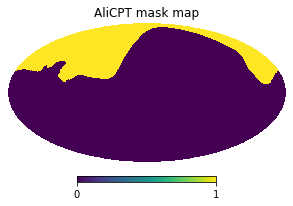

In [3]:
mask = hp.read_map('./data/ali_mask_r7.fits',dtype=bool,verbose=False)

fig = matplotlib.pyplot.figure(figsize=(5,5))
gs = matplotlib.gridspec.GridSpec(5, 5)
fig.add_subplot(gs[0:5, 0:5])
hp.mollview(mask,title='AliCPT mask map',hold=True)

### use `pstimator` functions (with NaMaster support)

- call the `pstimator` only once

In [4]:
est = ap.pstimator()

(1e-08, 1000.0)

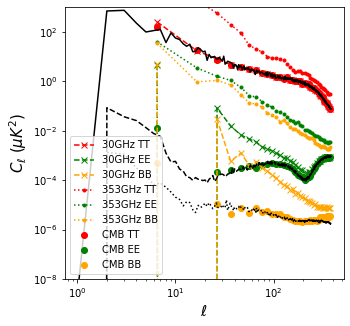

In [5]:
auto_cmb = est.auto_teb(mapcmb, mask, aposcale=1.0, binning=10)
auto_30 = est.auto_teb(map30, mask, aposcale=1.0, binning=10)
auto_353 = est.auto_teb(map353, mask, aposcale=1.0, binning=10)

fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.scatter(auto_cmb[0],auto_cmb[1],
           color='red',marker='o',label=r'CMB TT')
ax.scatter(auto_cmb[0],auto_cmb[2],
           color='green',marker='o',label=r'CMB EE')
ax.scatter(auto_cmb[0],auto_cmb[3],
           color='orange',marker='o',label=r'CMB BB')

ax.plot(auto_30[0],auto_30[1],
        color='red',linestyle='--',marker='x',label=r'30GHz TT')
ax.plot(auto_30[0],auto_30[2],
        color='green',linestyle='--',marker='x',label=r'30GHz EE')
ax.plot(auto_30[0],auto_30[3],
        color='orange',linestyle='--',marker='x',label=r'30GHz BB')

ax.plot(auto_353[0],auto_353[1],
        color='red',linestyle=':',marker='.',label=r'353GHz TT')
ax.plot(auto_353[0],auto_353[2],
        color='green',linestyle=':',marker='.',label=r'353GHz EE')
ax.plot(auto_353[0],auto_353[3],
        color='orange',linestyle=':',marker='.',label=r'353GHz BB')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot(cmb_cl[0],
        color='black',linestyle='-')
ax.plot(cmb_cl[1],
        color='black',linestyle='--')
ax.plot(cmb_cl[2],
        color='black',linestyle=':')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=3)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\mu K^2$)',fontsize=15)
ax.set_ylim((1.e-8,1.e3))

- PS estimator function correctness check

(1e-08, 1000.0)

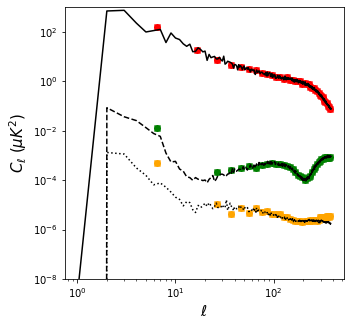

In [6]:
cross_cmb = est.cross_teb(np.vstack([mapcmb,mapcmb]), mask, aposcale=1.0, binning=10)
atuo_t_cmb = est.auto_t(mapcmb[0].reshape(1,-1), mask, aposcale=1.0, binning=10)
cross_t_cmb = est.cross_t(np.vstack([mapcmb[0].reshape(1,-1),mapcmb[0].reshape(1,-1)]),
                          mask, aposcale=1.0, binning=10)
atuo_eb_cmb = est.auto_eb(mapcmb[1:].reshape(2,-1), mask, aposcale=1.0, binning=10)
cross_eb_cmb = est.cross_eb(np.vstack([mapcmb[1:].reshape(2,-1),mapcmb[1:].reshape(2,-1)]),
                            mask, aposcale=1.0, binning=10)

fig,ax = matplotlib.pyplot.subplots(figsize=(5,5))

ax.scatter(cross_cmb[0],cross_cmb[1],
           color='red',marker='o')
ax.scatter(cross_cmb[0],cross_cmb[2],
           color='green',marker='o')
ax.scatter(cross_cmb[0],cross_cmb[3],
           color='orange',marker='o')

ax.scatter(atuo_t_cmb[0],atuo_t_cmb[1],
           color='red',marker='x')
ax.scatter(cross_t_cmb[0],cross_t_cmb[1],
           color='red',marker='.')

ax.scatter(atuo_eb_cmb[0],atuo_eb_cmb[1],
           color='green',marker='x')
ax.scatter(atuo_eb_cmb[0],atuo_eb_cmb[2],
           color='orange',marker='x')
ax.scatter(cross_eb_cmb[0],cross_eb_cmb[1],
           color='green',marker='.')
ax.scatter(cross_eb_cmb[0],cross_eb_cmb[2],
           color='orange',marker='.')

cmb_cl = hp.anafast(mapcmb)
ell = np.arange(cmb_cl.shape[1])
ax.plot(cmb_cl[0],
        color='black',linestyle='-')
ax.plot(cmb_cl[1],
        color='black',linestyle='--')
ax.plot(cmb_cl[2],
        color='black',linestyle=':')

ax.set_yscale('log')
ax.set_xscale('log')
#ax.legend(loc=3)
ax.set_xlabel(r'$\ell$',fontsize=15)
ax.set_ylabel(r'$C_\ell$ ($\mu K^2$)',fontsize=15)
ax.set_ylim((1.e-8,1.e3))

end